# Study Loop Problem

In [1]:
%load_ext autoreload
%autoreload 2

import clique_discovery 
from helpers import *

## Algorithms

Given a finite set of symbols $\Sigma$, a trace $T$ is defined as a finite sequence $T \in \Sigma^*, T = \sigma_1 \sigma_2 ... \sigma_M$. Let be $\overline{T} = \{ T_1, ... , T_N \}$, a set of N traces. The following algorithms are proposed.

**Definition: Successor Pairs in $\overline{T}$**

The idea is to retain the order of appearance of each symbol as edges in a directed graph, but discarding the repetitions. Given a trace $T$ of length $M$, we define $\phi^T_{\sigma_i}$ as the maximal sequence of ordered pairs starting at $\sigma_i$ not containing $(\sigma_i,\sigma_i)$:

$\phi^T_{\sigma_i} = (\sigma_i,\sigma_{i+1}) ... (\sigma_i,\sigma_j), 1 \le i < j \le M $ such that $\sigma_i \ne \sigma_j$

The *partial successor pairs $\phi^T$* is the concatenation in order:

$\phi^T = \phi^T_{\sigma_1} \phi^T_{\sigma_2} ... \phi^T_{\sigma_M} $

The *successor pairs sequence of $\overline{T}$* is defined as the concatenation of $\phi^{T_i}$ for all $T_i \in \overline{T}$: 

$\Phi^\overline{T} = \phi^{T_1} ... \phi^{T_N} = (\sigma_1^a,\sigma_1^b)(\sigma_2^a,\sigma_2^b) ... = p_1p_2 ...  $ 

**Definition: Weigthed Successor Pairs of $\overline{T}$**

Let's define $p \cap^\# \Phi'$ as the number of appearances of the pair $p$ in a sequence of pairs $ \Phi'$ . Then the *weighted successors set of pairs in $\Phi^\overline{T}$* is defined as

$\Phi^\overline{T}_{w} = \{ p_i \in \Phi^\overline{T} | p_i \cap^\# \Phi^\overline{T} = w \}$

(Me falta poner como ejemplo ABCDE y decir que corresponde a la traza de un simple path de un control flow graph) 

### Obtain serial control flow tree

Given a trace $\overline{T}$, obtain the inferred paths of $\overline{T}$, create a graph with its symbols and *untangle* it by removing extra edges.

1. Obtain the set of succesor pairs $\Phi^\overline{T}$
1. For each $\Phi^\overline{T}_{w} \ne \emptyset$ 
  1. Construct a directed graph $G_w = (V_w, E_w) $ with $ E_w = \{ p_i \in \Phi^\overline{T}_{w} \}$
  1. Obtain the clique set $Cliques(G_w^u) = \{ V1, ..., V_Q \}$ (vertex set of the maximal connected components) of the undirected equivalent $G_w^u$ 
  1. For each $C_i \in Cliques(G')$ construct a sequence $P_i^w = v_0 ... v_{ | C_i |  }$ such that $ in\_degree( v_i , G_w ) = i $
1. $P^\overline{T} = \cup{ P_i^w }$ is the set of inferred paths of $\overline{T}$
1. Be $F' = (V_{F'}, E_{F'}) $ constructed from all the pairs $ E_F = \{ (\sigma_i^k, \sigma_i+1^k) \}$ such that $\sigma_i^k, \sigma_i+1^k$ appears consecutive in some $ P_k \subset P^\overline{T} $
1. Be $F = ( V_F = V_{F'}, E_F \subset E_{F'} )$

### Infer a serial control flow graph

### Infer a parallel control flow graph

## Still Failing Examples

[('l', 'k'), ('k', 'l')]


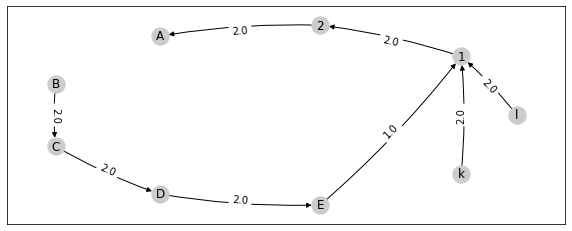

1 2 2.0 1.0
2 1 1.0 2.0
2 A 2.0 0.67
A 2 0.67 2.0
A B 2.0 1.0
B A 1.0 2.0
B C 2.0 1.0
C B 1.0 2.0
l k 1.33 0.33
k l 0.33 1.33


In [2]:
combined_loops = [
    list("lklk1212ABCDEABCDEABCDE1212"),
    list("lk12ABCDEABCDE"),
    list("lk12ABCDE"),

]
inferred_paths = clique_discovery.infer_paths_from_traces( combined_loops )
# nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )

G = clique_discovery.created_auxiliary_graph( inferred_paths )
for a in list("12ABClk"):
    for b in list("12ABClk"):
        try:
            print (a, b, G.edges[a, b]["weight"], G.edges[b, a]["weight"])
        except:
            pass

{1.5: [['A', 'd', 'e', 'f'], ['B', 'd', 'e', 'f'], ['C', 'd', 'e', 'f']], 1.25: [['2', 'd'], ['2', 'f'], ['2', 'e'], ['1', 'd'], ['1', 'f'], ['1', 'e']], 1.0: [['F', 'G']], 0.75: [['A', 'B', 'C', 'G'], ['f', 'e', 'd', 'G'], ['A', 'B', 'C', 'F'], ['f', 'e', 'd', 'F']], 0.5: [['h', 'j', 'k'], ['1', '2', 'B'], ['1', '2', 'G'], ['1', '2', 'C'], ['1', '2', 'A'], ['1', '2', 'F']], 0.25: [['3', '4', 'f'], ['3', '4', 'B'], ['3', '4', 'd'], ['3', '4', 'G'], ['3', '4', 'F'], ['3', '4', 'C'], ['3', '4', 'A'], ['3', '4', 'e'], ['k', 'j', 'h', 'G'], ['k', 'j', 'h', 'F']]}


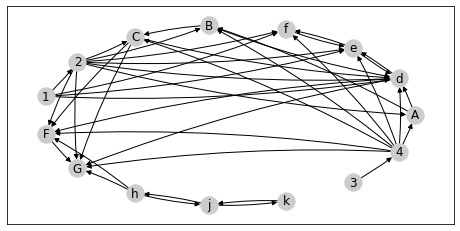

[('d', 'e'), ('e', 'd'), ('e', 'f'), ('f', 'e'), ('h', 'j'), ('j', 'h'), ('j', 'k'), ('k', 'j')]


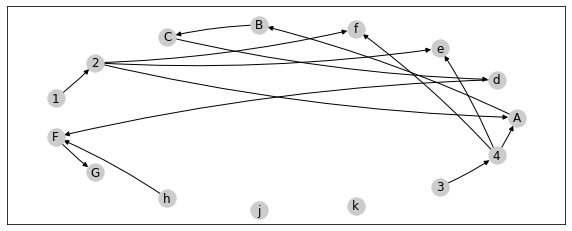

In [3]:
loop_inside = [
    list("12ABCdefdefFG"),
    list("12ABCdefdefdefFG"),
    list("34ABCdefFG"),
    list("hjkhjkFG")
]
inferred_paths = clique_discovery.infer_paths_from_traces( loop_inside )
nice_graph( inferred_paths, with_weigths=False )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ), with_weigths=False )
# inferred_paths

{3.0: [['2', 'A', 'B', 'C', 'D'], ['1', 'A', 'B', 'C', 'D']], 2.0: [['2', 'e', 'f'], ['1', 'e', 'f']], 1.0: [['1', '2'], ['f', 'e']]}


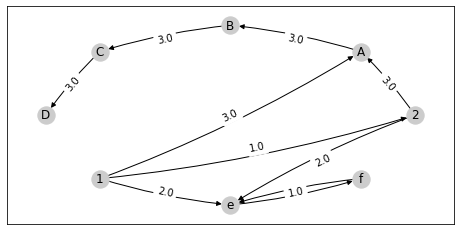

[]


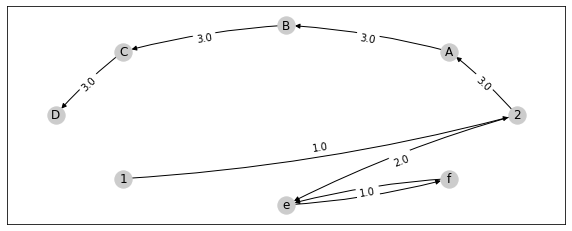

In [4]:
head_with_loop = [
    list("12ABCDefABCDABCDef"),
]
inferred_paths = clique_discovery.infer_paths_from_traces( head_with_loop )
nice_graph( inferred_paths )
untangled_graph( clique_discovery.minimally_connected_graph( inferred_paths ) )